In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn
import datetime

In [3]:
automobile = pd.read_csv('auto-mpg.csv')
automobile.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10
115,15.0,8,350.0,145,4082,13.0,73,1,chevrolet monte carlo s
263,17.7,6,231.0,165,3445,13.4,78,1,buick regal sport coupe (turbo)
220,33.5,4,85.0,70,1945,16.8,77,3,datsun f-10 hatchback
48,18.0,6,250.0,88,3139,14.5,71,1,ford mustang


In [4]:
automobile = automobile.replace('?', np.nan)

In [7]:
automobile.shape

(398, 9)

In [8]:
automobile = automobile.dropna()

In [9]:
automobile.shape

(392, 9)

In [10]:
#Drop name of the car and origin column it is irrelavant to prediction

automobile.drop(['origin','car name'], axis = 1, inplace=True)

In [11]:
automobile.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
164,21.0,6,231.0,110,3039,15.0,75
222,17.0,8,260.0,110,4060,19.0,77
213,13.0,8,350.0,145,4055,12.0,76


In [12]:
automobile['model year'] = '19' + automobile['model year'].astype(str)

In [13]:
automobile.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
151,31.0,4,79.0,67,2000,16.0,1974
30,28.0,4,140.0,90,2264,15.5,1971
218,36.0,4,79.0,58,1825,18.6,1977


In [14]:
automobile['age'] = datetime.datetime.now().year - pd.to_numeric(automobile['model year'])

In [15]:
automobile.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
372,27.0,4,151.0,90,2735,18.0,1982,39
45,18.0,6,258.0,110,2962,13.5,1971,50
386,25.0,6,181.0,110,2945,16.4,1982,39


In [22]:
#Drop model year column

automobile.drop(['model year'], axis =1, inplace=True )

In [23]:
automobile.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
186,27.0,4,101.0,83,2202,15.3,45
306,28.8,6,173.0,115,2595,11.3,42
139,14.0,8,302.0,140,4638,16.0,47


In [25]:
automobile.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [26]:
#Lets fix horsepower to numeric

automobile['horsepower'] = pd.to_numeric(automobile['horsepower'], errors = 'coerce')

In [27]:
automobile.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,45.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,42.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,45.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


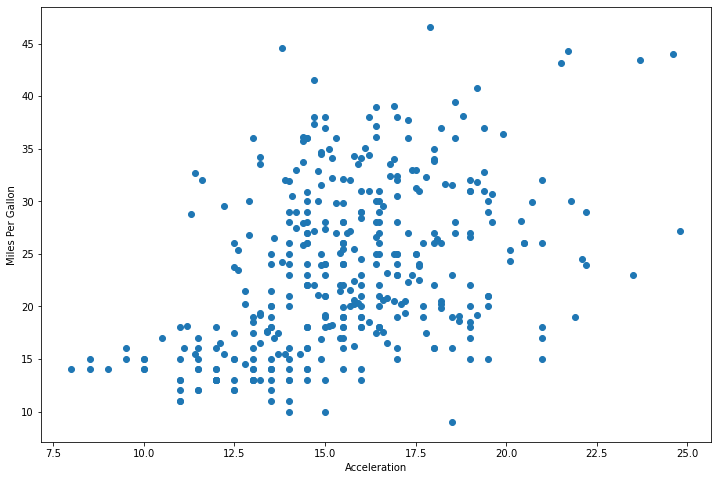

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile['acceleration'], automobile['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles Per Gallon')

plt.show()

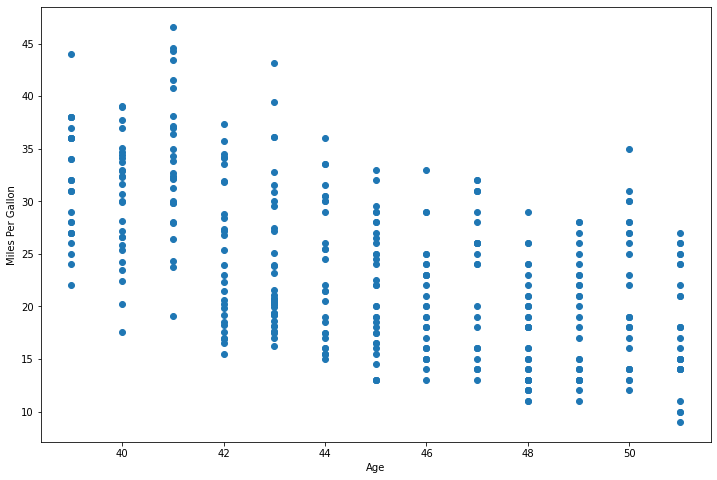

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile['age'], automobile['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles Per Gallon')

plt.show()

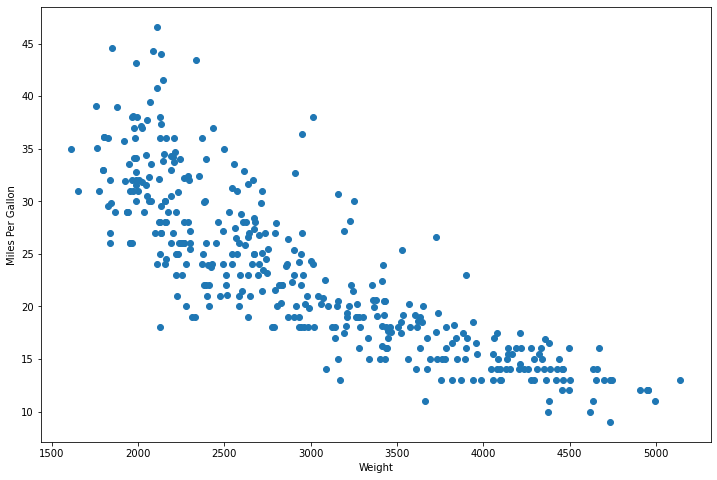

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile['weight'], automobile['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

plt.show()

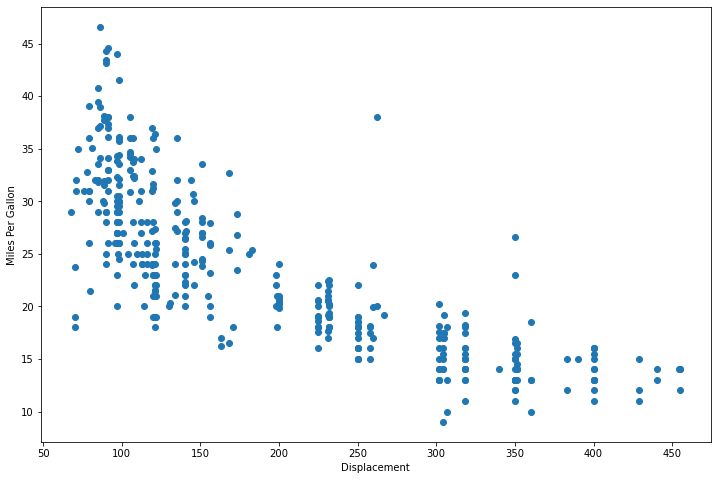

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile['displacement'], automobile['mpg'])

plt.xlabel('Displacement')
plt.ylabel('Miles Per Gallon')

plt.show()

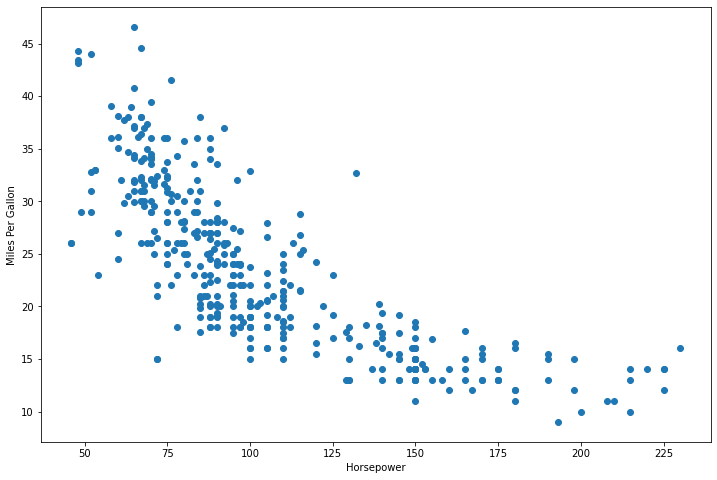

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile['horsepower'], automobile['mpg'])

plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')

plt.show()

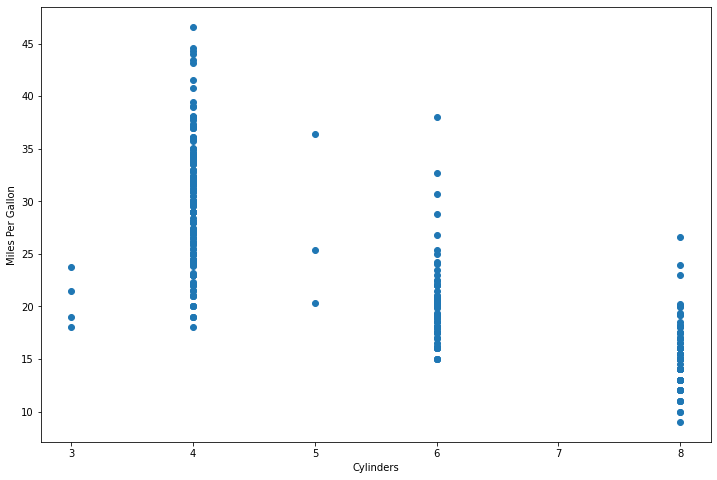

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile['cylinders'], automobile['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles Per Gallon')

plt.show()

In [35]:
automobile_corr = automobile.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot:>

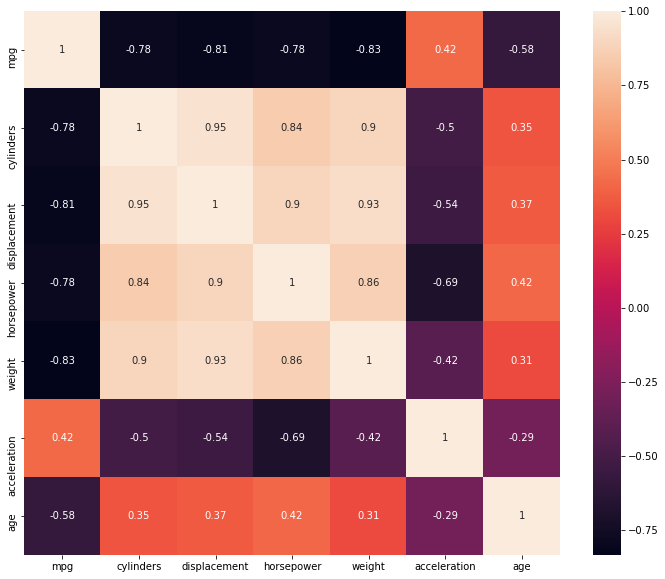

In [36]:
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(automobile_corr, annot = True)

In [37]:
automobile = automobile.sample(frac=1).reset_index(drop=True)
automobile.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,12.0,8,350.0,180,4499,12.5,48
1,37.2,4,86.0,65,2019,16.4,41
2,21.0,6,199.0,90,2648,15.0,51
3,36.0,4,105.0,74,1980,15.3,39
4,25.0,4,110.0,87,2672,17.5,51


In [38]:
automobile.to_csv('automobile_processed.csv', index = False)

In [39]:
!ls

 automobile_processed.csv   building-regression-models-scikit-learn
 auto-mpg.csv		    exams.csv
 auto-mpg-processed.csv    'M01_D01_Exploring The Automobile MPG Dataset.ipynb'
